In [ ]:
'''
We will be analyzing and visualizing the data in a Jupyter Notebook by reading from S3

'''


# importing required libraries

import boto3
import pandas as pd
import matplotlib.pyplot as plt
import configparser

In [2]:
config = configparser.ConfigParser()
config.read('credentials.ini')

['credentials.ini']

In [ ]:
# Download data from S3

s3 = boto3.client('s3', 
                  aws_access_key_id=config['AWS']['access_key'],
                  aws_secret_access_key=config['AWS']['secret_key'])

bucket = config['AWS']['bucket_name']

In [ ]:
# List and combine partitioned files

all_objects = []
paginator = s3.get_paginator('list_objects_v2')
for page in paginator.paginate(Bucket=bucket, Prefix='videos/'):
    all_objects.extend(page['Contents'])
    
dfs = []
for obj in all_objects:
    if obj['Key'].endswith('.csv'):
        file = s3.get_object(Bucket=bucket, Key=obj['Key'])
        dfs.append(pd.read_csv(file['Body']))
        
df = pd.concat(dfs)

In [ ]:
# number of rows and number of columns in the dataframe

df.shape

(742, 8)

C:\Users\ziaul\AppData\Local\Temp\ipykernel_15772\559948269.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df.groupby(pd.to_datetime(df['publishedAt']).dt.to_period("M"))['id'].count().plot()


Text(0, 0.5, 'Video Count')

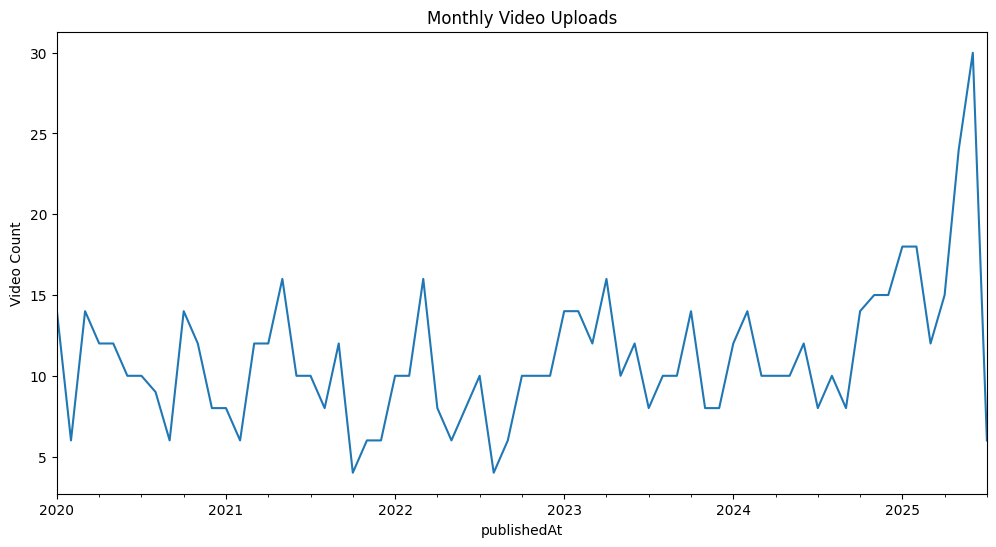

In [ ]:
# Sample Analysis

plt.figure(figsize=(12,6))
df.groupby(pd.to_datetime(df['publishedAt']).dt.to_period("M"))['id'].count().plot()
plt.title('Monthly Video Uploads')
plt.ylabel('Video Count')